In [1]:
import pandas as pd
import geopandas
import fiona
from matplotlib import pyplot as plt

In [2]:
indicator_data=pd.read_csv("indicator_data.csv",encoding="latin_1")
processed_data=pd.read_csv("processed_data.csv",encoding="latin_1")

C:\Users\chenl\AppData\Local\Temp\ipykernel_3520\2365895264.py:2: DtypeWarning: Columns (13,17,19,20,21,26,29,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77,79,81,83,85,87,89,91,93,95,97,99,101,103,105,107,109,111,113,115,117,119,120,123,125,127,128,129,131,132,133,134,135,136,137,141,142,143,144,145,146,147,150,151,152,153,154,155,157,158,159,160,162,163,164,165,166,167,168,169,170,171,172,173,174,177,179,180,181,182,183,184,185,186,188,189,190,191,192,204,205,208,209,210,211,212,213,214,215,216,219,220,222,230,232,240,242,250,257,258,259,260,261,262,263,264,265,266,269,270,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,

In [25]:
indicator_processed=pd.DataFrame(indicator_data,columns=["hfias_status","hh_size_members","land_cultivated_ha"]) #this is the column that we are going to use
processed__data=pd.DataFrame(processed_data,columns=["id_country","country","id_proj"])
#select the using data columns in processed_data

In [26]:
food_safety = pd.concat([processed__data,indicator_processed], axis=1)#combine these two data together

In [27]:
food_safety_tz=food_safety.loc[food_safety['id_country'] == 'tz']#select the Tanzania from the data

In [28]:
food_safety_tz["id_proj"].unique() #see the projects' kinds 

array(['cfm', 'cra', 'glv', 'srl'], dtype=object)

In [29]:
food_safety_tz

,id_country,country,id_proj,hfias_status,hh_size_members,land_cultivated_ha
28766,tz,tanzania,cfm,food_secure,4,0.8
28767,tz,tanzania,cfm,food_secure,10,0.8
28768,tz,tanzania,cfm,food_secure,5,0.8
28769,tz,tanzania,cfm,food_secure,11,1.2
28770,tz,tanzania,cfm,severely_fi,6,0.8
...,...,...,...,...,...,...
31641,tz,tanzania,srl,food_secure,3,2.8
31642,tz,tanzania,srl,severely_fi,1,3.6
31643,tz,tanzania,srl,severely_fi,4,4.0
31644,tz,tanzania,srl,severely_fi,2,2.8


In [30]:
class_mapping = {'food_secure':1, 'mildly_fi':2,'moderately_fi':3,'severely_fi':4} #trun string into number

In [31]:
food_safety_tz['hfias_status'] = food_safety_tz['hfias_status'].map(class_mapping)

C:\Users\chenl\AppData\Local\Temp\ipykernel_3520\3958681546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_safety_tz['hfias_status'] = food_safety_tz['hfias_status'].map(class_mapping)


In [32]:
land_cultivated_data=food_safety_tz['land_cultivated_ha'] #select column land_cultivated_ha from dataset
hfias = food_safety_tz['hfias_status']
food_safety_tz_2=food_safety_tz.loc[food_safety_tz['land_cultivated_ha']<=2] # data preprocessing
land_cultivated_data_2=food_safety_tz_2['land_cultivated_ha'] #select column land_cultivated_ha from dataset
hfias_2 = food_safety_tz_2['hfias_status']
food_safety_tz_4=food_safety_tz.loc[(food_safety_tz['land_cultivated_ha']<=4)&(food_safety_tz['land_cultivated_ha']>2)]# data preprocessing
land_cultivated_data_4=food_safety_tz_4['land_cultivated_ha'] #select column land_cultivated_ha from dataset
hfias_4 = food_safety_tz_4['hfias_status']
food_safety_tz_6=food_safety_tz.loc[(food_safety_tz['land_cultivated_ha']<=6)&(food_safety_tz['land_cultivated_ha']>4)]# data preprocessing
land_cultivated_data_6=food_safety_tz_6['land_cultivated_ha'] #select column land_cultivated_ha from dataset
hfias_6 = food_safety_tz_6['hfias_status']
food_safety_tz_8=food_safety_tz.loc[(food_safety_tz['land_cultivated_ha']<=8)&(food_safety_tz['land_cultivated_ha']>6)]# data preprocessing
land_cultivated_data_8=food_safety_tz_8['land_cultivated_ha'] #select column land_cultivated_ha from dataset
hfias_8 = food_safety_tz_8['hfias_status']
food_safety_tz_10=food_safety_tz.loc[(food_safety_tz['land_cultivated_ha']<=10)&(food_safety_tz['land_cultivated_ha']>8)]# data preprocessing
land_cultivated_data_10=food_safety_tz_10['land_cultivated_ha'] #select column land_cultivated_ha from dataset
hfias_10 = food_safety_tz_10['hfias_status']
food_safety_tz_100=food_safety_tz.loc[(food_safety_tz['land_cultivated_ha']>10)&(food_safety_tz['land_cultivated_ha']<=100)]
land_cultivated_data_100=food_safety_tz_100['land_cultivated_ha'] #select column land_cultivated_ha from dataset
hfias_100 = food_safety_tz_100['hfias_status']
food_safety_tz_200=food_safety_tz.loc[(food_safety_tz['land_cultivated_ha']>100)&(food_safety_tz['land_cultivated_ha']<=200)]
land_cultivated_data_200=food_safety_tz_200['land_cultivated_ha'] #select column land_cultivated_ha from dataset
hfias_200 = food_safety_tz_200['hfias_status']
food_safety_tz_n=food_safety_tz.loc[food_safety_tz['land_cultivated_ha']>200]
land_cultivated_data_n=food_safety_tz_n['land_cultivated_ha'] #select column land_cultivated_ha from dataset
hfias_n = food_safety_tz_n['hfias_status']

In [33]:
land_cultivated_data.mean()

4.757537818055072

### As we can see, the mean of the land cultivated data is 4.75,  we need to clean the data.

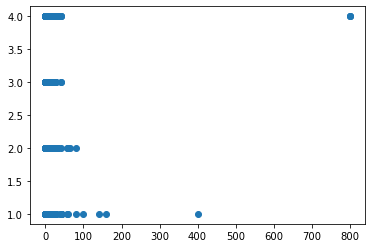

In [34]:
plt.scatter(land_cultivated_data,hfias) # the relationship before cleaning the data

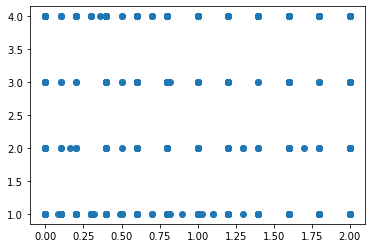

In [35]:
plt.scatter(land_cultivated_data_2,hfias_2)

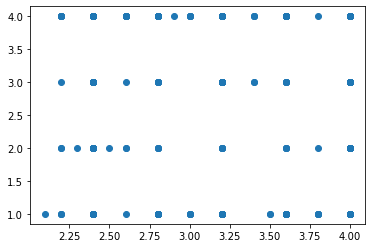

In [36]:
plt.scatter(land_cultivated_data_4,hfias_4)

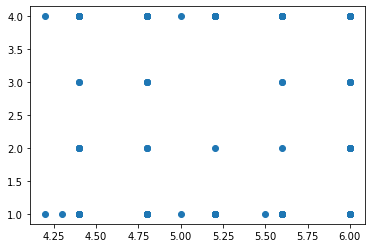

In [37]:
plt.scatter(land_cultivated_data_6,hfias_6)

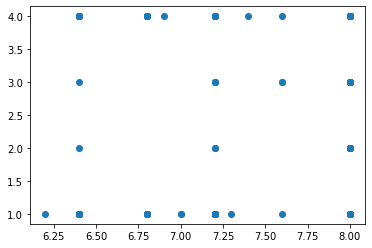

In [38]:
plt.scatter(land_cultivated_data_8,hfias_8)

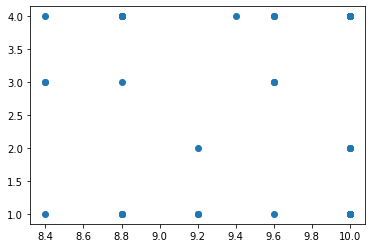

In [39]:
plt.scatter(land_cultivated_data_10,hfias_10)

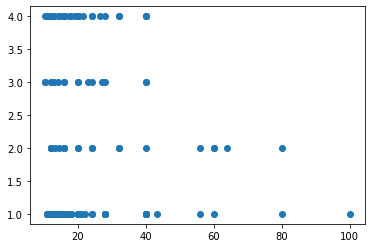

In [40]:
plt.scatter(land_cultivated_data_100,hfias_100)

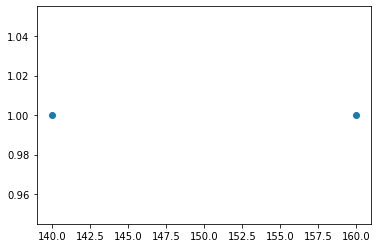

In [41]:
plt.scatter(land_cultivated_data_200,hfias_200)

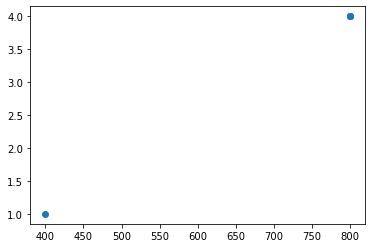

In [48]:
plt.scatter(land_cultivated_data_n,hfias_n)

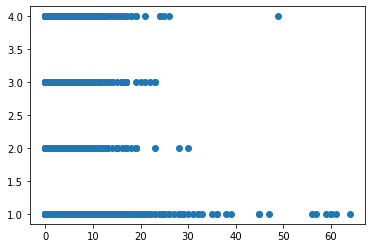

In [49]:
plt.scatter(Y1,hfias)

### We can see that when the data is larger than 40, the points are too few to be used.

In [43]:
food_safety_tz.mean()

C:\Users\chenl\AppData\Local\Temp\ipykernel_3520\1846632248.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  food_safety_tz.mean()


hfias_status          2.220486
hh_size_members       6.564583
land_cultivated_ha    4.757538
dtype: float64

In [ ]:
plt.scatter(land_cultivated_data,hfias) # the relationship before cleaning the data

In [44]:
import numpy as np
X = food_safety_tz['land_cultivated_ha']
Y = food_safety_tz['hfias_status']
cov_land_cultivated_ha = np.cov(X, Y)
corrcoef_land_cultivated_ha=np.corrcoef(X,Y)#land_cultivated_ha

In [23]:
print(cov_land_cultivated_ha)
print(corrcoef_land_cultivated_ha) #plot

[[       nan        nan]
 [       nan 1.81694731]]
[[nan nan]
 [nan  1.]]


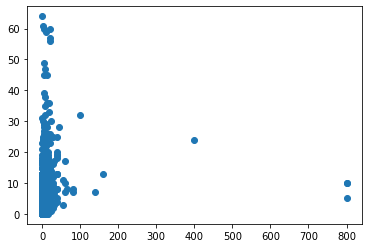

In [45]:
X1 = food_safety_tz['land_cultivated_ha'] #clean
Y1=food_safety_tz['hh_size_members']

plt.scatter(X1,Y1)

6.564583333333333

In [ ]:
food_safety_hh=pd.DataFrame(food_safety_tz,columns=["hfias_status","hh_size_members","id_proj"])

In [ ]:
food_safety_hh

In [ ]:
food_safety_hh.groupby('hfias_status').hh_size_members.plot(kind='kde')  #hh_size_members

In [ ]:
plt.scatter(X,Y)#remove 800 and 400

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
food_safety_tz.groupby('hfias_status').land_cultivated_ha.plot(kind='kde') #land_cultivated_ha

In [50]:
import numpy as np
X = food_safety_tz['hh_size_members']
Y = food_safety_tz['hfias_status']
result1 = np.cov(X, Y)
result2=np.corrcoef(X,Y)#land_cultivated_ha

In [51]:
result2

array([[ 1.        , -0.17597862],
       [-0.17597862,  1.        ]])

In [ ]:
food_safety_tz_processed_ha.groupby('hfias_status').land_cultivated_ha.hist()

In [52]:
import numpy as np
X1 = food_safety_tz['hh_size_members']
Y1 = food_safety_tz['hfias_status']
result1 = np.cov(X1, Y1)
result2=np.corrcoef(X1,Y1) #hh_size_members

In [ ]:
X1.mean()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
food_safety_tz.groupby('hfias_status').hh_size_members.plot(kind='kde',grid=True)
X1.plot.kde()

In [ ]:
food_safety_tz.groupby('hfias_status').hh_size_members.hist()